In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from cosmoblender import tools as tls
from cosmoblender import qest
from cosmoblender import biases

/var/folders/zf/xwwhf0ps6yx93zy9ttqm3mm80000gn/T/ipykernel_79290/133338249.py:5: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


IMPORT ERROR: /Users/antonbaleatolizancos/anaconda3/envs/for_cosmoblender/lib/python3.11/site-packages/quicklens-0.0.0-py3.11.egg/quicklens/mpi.py (No module named 'pypar'). Could not load pbs or pypar. MPI will not be used.
IMPORT ERROR: /Users/antonbaleatolizancos/anaconda3/envs/for_cosmoblender/lib/python3.11/site-packages/quicklens-0.0.0-py3.11.egg/quicklens/shts/__init__.py (No module named 'fsht'). Try running 'python setup.py install' or 'python setup.py build_ext --inplace' from the quicklens directory.


Initialise experiment object

In [2]:
# Foreground cleaning? Only relevant if many frequencies are provided
MV_ILC_bool = True 
deproject_CIB = False
deproject_tSZ = False
fg_cleaning_dict = {'MV_ILC_bool':MV_ILC_bool, 'deproject_CIB':deproject_CIB, 'deproject_tSZ':deproject_tSZ}

In [3]:
SPT_properties = {'nlev_t': np.array([18.]),
                  'beam_size':np.array([1.]),
                  'freq_GHz': np.array([143.])}

# Initialise experiments with various different mass cuts
SPT_5e15 = qest.experiment(lmax = 3000, massCut_Mvir=5e15, **SPT_properties, **fg_cleaning_dict)

In [4]:
SO_properties = {'nlev_t': np.array([52., 27., 5.8, 6.3, 15., 37.]),
                 'beam_size':np.array([7.4, 5.1, 2.2, 1.4, 1.0, 0.9]),
                 'freq_GHz': np.array([27.3, 41.7, 93., 143., 225.,278.])}

# Initialise experiments with various different mass cuts
SO_5e15 = qest.experiment(lmax = 4000, massCut_Mvir=1e16, **SO_properties, **fg_cleaning_dict)

In [5]:
# Choose an experiment
experiment = SO_5e15

One can later inspect the properties by doing

In [6]:
print(experiment)

Mass Cut: 1.00e+16  lmax: 4000  Beam FWHM: [7.4 5.1 2.2 1.4 1.  0.9] Noise (uK arcmin): [52.  27.   5.8  6.3 15.  37. ]  Freq (GHz): [ 27.3  41.7  93.  143.  225.  278. ]


Initialise halo model calculator

In [7]:
# You can specify a cosmological model -- in this case, match Websky
H0 = 68.
cosmoParams = {'As':2.08e-9,'ns':.965,'omch2':(0.31-0.049)*(H0/100.)**2,'ombh2':0.049*(H0/100.)**2,'tau':0.055,'H0':H0}

z_max = 5 #3
nZs = 40 #50
nMasses = 40  #30
Mmin = 1e8 #Keep this low -- the 2h term of the bispectrum bias can be sensitive to quite low-mass halos

# Set CIB halo model
cib_model='planck13'#'vierro'

# Initialise a halo model object for the calculation, using mostly default parameters
hm_calc = biases.hm_framework(cosmoParams=cosmoParams, m_min=Mmin, nZs=nZs, nMasses=nMasses, cib_model=cib_model, z_max=z_max)

Again, we can print out its properties

In [8]:
print(hm_calc)

M_min: 1.00e+08  M_max: 5.00e+15  n_Masses: 40
  z_min: 0.07  z_max: 5.00  n_zs: 40
  Mass function: sheth-torman  Mass definition: vir


# Calculate the biases

Run the main function for each of the mass cuts, and for either the tsz or cib calculation, using the FFTlog approach

Calculate and plot the biases

In [9]:
which_bias = 'total' # 'total' or 'tsz' or 'cib' or 'mixed'

# Calculate secondary bispectrum bias? Note that this is a bit lower that the other implemented terms
get_secondary_bispec_bias = False
parallelise_secondbispec = False

if which_bias=='total' or which_bias=='tsz':
    hm_calc.get_tsz_auto_biases(experiment, get_secondary_bispec_bias=get_secondary_bispec_bias,
                                parallelise_secondbispec=parallelise_secondbispec, bin_width_out_second_bispec_bias=100)
if which_bias=='total' or which_bias=='cib':
    hm_calc.get_cib_auto_biases(experiment, get_secondary_bispec_bias=get_secondary_bispec_bias,
                               parallelise_secondbispec=parallelise_secondbispec, bin_width_out_second_bispec_bias=100)
if which_bias=='total' or which_bias=='mixed':
    hm_calc.get_mixed_auto_biases(experiment, get_secondary_bispec_bias=get_secondary_bispec_bias,
                                 parallelise_secondbispec=parallelise_secondbispec, bin_width_out_second_bispec_bias=100)

2025-01-13 15:46:37.515329: W pjrt_plugin/src/mps_client.cc:534] WARNING: JAX Apple GPU support is experimental and not all JAX functionality is correctly supported!


Metal device set to: Apple M2 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB

Now in parallel loop 0
Now in parallel loop 1
Now in parallel loop 2
Now in parallel loop 3
Now in parallel loop 4
Now in parallel loop 5
Now in parallel loop 6
Now in parallel loop 7
Now in parallel loop 8
Now in parallel loop 9
Now in parallel loop 10
Now in parallel loop 11
Now in parallel loop 12
Now in parallel loop 13
Now in parallel loop 14
Now in parallel loop 15
Now in parallel loop 16
Now in parallel loop 17
Now in parallel loop 18
Now in parallel loop 19
Now in parallel loop 20
Now in parallel loop 21
Now in parallel loop 22
Now in parallel loop 23
Now in parallel loop 24
Now in parallel loop 25
Now in parallel loop 26
Now in parallel loop 27
Now in parallel loop 28
Now in parallel loop 29
Now in parallel loop 30
Now in parallel loop 31
Now in parallel loop 32
Now in parallel loop 33
Now in parallel loop 34
Now in parallel loop 35
Now in parallel loop 36
Now in parallel loop 37
Now in parallel 

In [11]:
experiment.biases['total']['prim_bispec']['1h']

array([ 3.09542563e-15+0.j, -2.31560904e-15+0.j, -1.68350077e-16+0.j,
       -3.83702240e-17+0.j, -1.27813852e-17+0.j, -5.54369562e-18+0.j,
       -2.66800576e-18+0.j, -1.36243269e-18+0.j, -7.70528258e-19+0.j,
       -4.60724051e-19+0.j, -2.89221626e-19+0.j, -1.91240207e-19+0.j,
       -1.24811814e-19+0.j, -8.57260887e-20+0.j, -5.92165365e-20+0.j,
       -4.19107032e-20+0.j, -2.97842999e-20+0.j, -2.20808991e-20+0.j,
       -1.61778419e-20+0.j, -1.21140216e-20+0.j, -8.93424193e-21+0.j,
       -6.73747747e-21+0.j, -5.27505036e-21+0.j, -3.86351019e-21+0.j,
       -2.98787134e-21+0.j, -2.31921383e-21+0.j, -1.76363179e-21+0.j,
       -1.40583442e-21+0.j, -1.07451618e-21+0.j, -8.35870463e-22+0.j,
       -6.65001880e-22+0.j, -5.23160403e-22+0.j, -4.02505363e-22+0.j,
       -3.20504532e-22+0.j, -2.44200754e-22+0.j, -1.92269332e-22+0.j,
       -1.50621910e-22+0.j, -1.15242270e-22+0.j, -8.91816238e-23+0.j,
       -6.65794629e-23+0.j, -4.98097861e-23+0.j, -3.61489662e-23+0.j,
       -2.55324889e-

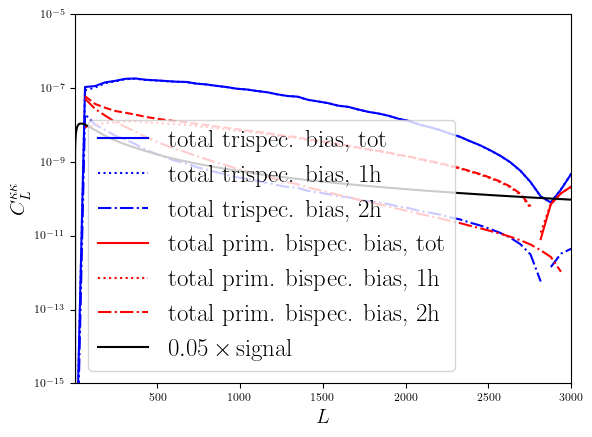

In [14]:
# Break down contributions into n-halo terms?
breakdown = True

plt.figure()
title=''

scaling = experiment.biases['ells']**4 /4.
if get_secondary_bispec_bias:
    # TODO: a factor of 1/2 would make the 2ndary bispec agree better with expectations
    scaling_second_bispec_bias = experiment.biases['second_bispec_bias_ells']**4 /4.
    #scaling_second_bispec_bias[:3] = np.nan

# Split into negative and positive parts for plotting convenience
prim_bispec_1h_pos, prim_bispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['1h'])
prim_bispec_2h_pos, prim_bispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h'])
prim_bispec_tot_pos, prim_bispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['prim_bispec']['2h']+experiment.biases[which_bias]['prim_bispec']['1h'])

trispec_1h_pos, trispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['1h'])
trispec_2h_pos, trispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h'])
trispec_tot_pos, trispec_tot_neg = tls.split_positive_negative(experiment.biases[which_bias]['trispec']['2h']+ experiment.biases[which_bias]['trispec']['1h'])

if get_secondary_bispec_bias:
    sec_bispec_1h_pos, sec_bispec_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['second_bispec']['1h'])
    sec_bispec_2h_pos, sec_bispec_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['second_bispec']['2h'])
    sec_bispec_tot_pos, sec_bispec_tot_neg = tls.split_positive_negative ( experiment.biases[which_bias]['second_bispec']['2h'] +experiment.biases[which_bias]['second_bispec']['1h'])

plt.plot(experiment.biases['ells'], scaling * trispec_tot_pos, color='b', label=r'{} trispec. bias, tot '.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * trispec_tot_neg, color='b', ls='--')

if breakdown:
    title='_withbreakdown'
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_pos, color='b', label=r'{} trispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * trispec_1h_neg, color='b', ls=':')

    plt.plot(experiment.biases['ells'], scaling * trispec_2h_pos, color='b', label=r'{} trispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * trispec_2h_neg, color='b', ls='-.')

plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_pos, color='r',label=r'{} prim. bispec. bias, tot'.format(which_bias))
plt.plot(experiment.biases['ells'], scaling * prim_bispec_tot_neg, color='r', ls='--')

if breakdown:
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_pos, color='r', label=r'{} prim. bispec. bias, 1h '.format(which_bias), ls=':')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_1h_neg, color='r', ls=':')

    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_pos, color='r', label=r'{} prim. bispec. bias, 2h '.format(which_bias), ls='-.')
    plt.plot(experiment.biases['ells'], scaling * prim_bispec_2h_neg, color='r', ls='-.')

if get_secondary_bispec_bias:
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_pos, color='orange',label=r'{} sec. bispec. bias, tot'.format(which_bias))
    plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_tot_neg, color='orange', ls='--')

    if breakdown:
        plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_pos, color='orange', label=r'{} sec. bispec. bias, 1h '.format(which_bias), ls=':')
        plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_1h_neg, color='orange', ls=':')

        plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_pos, color='orange', label=r'{} sec. bispec. bias, 2h '.format(which_bias), ls='-.')
        plt.plot(experiment.biases['second_bispec_bias_ells'], scaling_second_bispec_bias * sec_bispec_2h_neg, color='orange', ls='-.')

plt.plot(experiment.cl_unl.ls, 0.05* experiment.cl_unl.ls**4 * experiment.cl_unl.clpp /4.,'k', label=r'$0.05\,\times\,$signal')
plt.yscale('log')
plt.ylabel(r'$C_L^{\kappa\kappa}$',fontsize=15)
plt.xlabel(r'$L$',fontsize=15)
plt.xlim([2,3000])
plt.ylim([1e-15,1e-5])

plt.legend()

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

We can save the dictionary of biases to file as

In [13]:
experiment.save_biases()

and later retrieve them as

In [14]:
dict_of_biases = qest.load_dict_of_biases()

Successfully loaded experiment object with properties:

{'ells': array([   0,    1,    2, ..., 2998, 2999, 3000]), 'second_bispec_bias_ells': array([  60.,  160.,  260.,  360.,  460.,  560.,  660.,  760.,  860.,
        960., 1060., 1160., 1260., 1360., 1460., 1560., 1660., 1760.,
       1860., 1960., 2060., 2160., 2260., 2360., 2460., 2560., 2660.,
       2760., 2860.]), 'tsz': {'trispec': {'1h': array([0.00000000e+00+0.00000000e+00j, 1.24942343e-10-5.98300498e-43j,
       1.24822479e-10+6.99770292e-42j, ...,
       4.18599222e-21-9.01240484e-56j, 4.19472898e-21+4.52252586e-55j,
       4.20347487e-21-7.04123164e-56j]), '2h': array([0.00000000e+00+0.00000000e+00j, 3.59146596e-11+1.87119911e-25j,
       4.96649205e-11+2.59651506e-25j, ...,
       3.08710676e-23+1.60612043e-42j, 3.09427741e-23+1.60820563e-42j,
       3.10145628e-23+1.61029033e-42j])}, 'prim_bispec': {'1h': array([0.00000000e+00+0.00000000e+00j, 6.15741517e-11+1.62394753e-25j,
       3.12273637e-11+8.23585853e-26j, ...,
 

# Calculate biases to cross-correlations with galaxies

In [ ]:
survey_name = "DESI LRG"

# Add the HOD for the galaxy sample that we will be cross-correlating with CMB lensing
z_mean_gal, surface_ngal_of_z_gal = tls.get_DESI_surface_ngal_of_z('lrg')

# Assume a sample that's 100% complete above a stellar mass threshold of 10^11.5 Msun
hm_calc.hcos.add_hod(name=survey_name, mthresh=10**11.5+hm_calc.hcos.zs*0.) 

In [ ]:
which_bias = 'total' # 'total' or 'tsz' or 'cib' or 'mixed'

if which_bias=='total' or which_bias=='tsz':
    hm_calc.get_tsz_cross_biases(experiment, z_mean_gal, surface_ngal_of_z_gal, survey_name=survey_name)
if which_bias=='total' or which_bias=='cib':
    hm_calc.get_cib_cross_biases(experiment, z_mean_gal, surface_ngal_of_z_gal, survey_name=survey_name)
if which_bias=='total' or which_bias=='mixed':
    hm_calc.get_mixed_cross_biases(experiment, z_mean_gal, surface_ngal_of_z_gal, survey_name=survey_name)

# Split into negative and positive parts for plotting convenience
cross_w_gals_1h_pos, cross_w_gals_1h_neg = tls.split_positive_negative(experiment.biases[which_bias]['cross_w_gals']['1h'])
cross_w_gals_2h_pos, cross_w_gals_2h_neg = tls.split_positive_negative(experiment.biases[which_bias]['cross_w_gals']['2h'])

# Plot the signal clkg
pgm_1h = hm_calc.hcos.get_power_1halo("nfw", survey_name)
pgm_2h = hm_calc.hcos.get_power_2halo("nfw", survey_name)
Pgm = pgm_1h + pgm_2h
ells = np.linspace(2, 3000, 300)
Cls = hm_calc.hcos.C_kg(ells, hm_calc.hcos.zs, hm_calc.hcos.ks, Pgm, gzs=z_mean_gal, gdndz=surface_ngal_of_z_gal, lzs=1100.)

In [ ]:
plt.figure(figsize=(5, 5))
scaling = 0.5 * experiment.biases['ells']*(experiment.biases['ells']+1)

plt.plot(ells, 0.05 * Cls, 'k', label=r'signal $\times 0.05$')

plt.plot(experiment.biases['ells'], scaling * cross_w_gals_1h_pos, color='b', label='1-halo bias')
plt.plot(experiment.biases['ells'], scaling * cross_w_gals_1h_neg, color='b', ls='--')

plt.plot(experiment.biases['ells'], scaling * cross_w_gals_2h_pos, color='r', label='2-halo bias')
plt.plot(experiment.biases['ells'], scaling * cross_w_gals_2h_neg, color='r', ls='--')

plt.yscale('log')
plt.xlim([2, 3000])
ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.ylabel(r'$C_{L}^{\delta_{g}\kappa}$')
plt.xlabel(r'$L$')
plt.legend()
plt.title('Bias from {}'.format(which_bias))

# Calculate the biases to B-mode delensing

Take delensing of SO using single-frequency LAT lensing reconstructions (and E-modes) as an example

In [14]:
SO_properties = {'nlev_t': np.array([6.3]),
                 'beam_size': np.array([1.4]),
                 'freq_GHz': np.array([143.]), 'nx_secbispec':128}

# Foreground cleaning? Only relevant if many frequencies are provided
MV_ILC_bool = False 
deproject_CIB = False
deproject_tSZ = False
fg_cleaning_dict = {'MV_ILC_bool':MV_ILC_bool, 'deproject_CIB':deproject_CIB, 'deproject_tSZ':deproject_tSZ}

# Initialise experiments with various different mass cuts
SO_5e15 = qest.experiment(lmax = 3500, massCut_Mvir=5e15, **SO_properties, 
                          **fg_cleaning_dict, fg=False, atm_fg=False)

In [17]:
get_cib=True
get_tsz=True
get_mixed=True
get_secondary_bispec_bias=False

In [18]:
ells, cl_Btemp_x_Blens_bias, cl_Btemp_x_Btemp_bias, cl_Bdel_x_Bdel_bias = hm_calc.get_bias_to_delensed_clbb(SO_5e15, get_cib=get_cib, get_tsz=get_tsz, get_mixed=get_mixed, get_secondary_bispec_bias=get_secondary_bispec_bias)

Now in parallel loop 0
Now in parallel loop 1
Now in parallel loop 2
Now in parallel loop 3
Now in parallel loop 4
Now in parallel loop 5
Now in parallel loop 6
Now in parallel loop 7
Now in parallel loop 8
Now in parallel loop 9
Now in parallel loop 10
Now in parallel loop 11
Now in parallel loop 12
Now in parallel loop 13
Now in parallel loop 14
Now in parallel loop 15
Now in parallel loop 16
Now in parallel loop 17
Now in parallel loop 18
Now in parallel loop 19
Now in parallel loop 20
Now in parallel loop 21
Now in parallel loop 22
Now in parallel loop 23
Now in parallel loop 24
Now in parallel loop 25
Now in parallel loop 26
Now in parallel loop 27
Now in parallel loop 28
Now in parallel loop 29
Now in parallel loop 30
Now in parallel loop 31
Now in parallel loop 32
Now in parallel loop 33
Now in parallel loop 34
Now in parallel loop 35
Now in parallel loop 36
Now in parallel loop 37
Now in parallel loop 38
Now in parallel loop 39
Now in parallel loop 0
Now in parallel loop 1
Now 

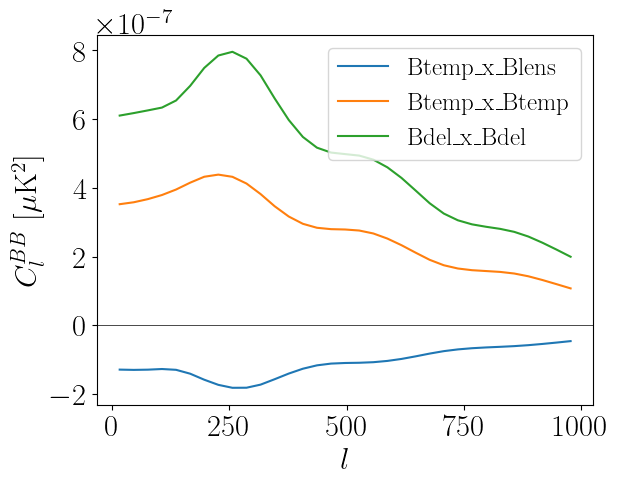

In [20]:
plt.plot(ells, cl_Btemp_x_Blens_bias, label=r'Btemp_x_Blens')
plt.plot(ells, cl_Btemp_x_Btemp_bias, label=r'Btemp_x_Btemp')
plt.plot(ells, cl_Bdel_x_Bdel_bias, label=r'Bdel_x_Bdel')
plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
#plt.ylim([-1e-6,6e-6])
#plt.ylim([-1e-7,2.1e-7])

Now in parallel loop 0
Now in parallel loop 1
Now in parallel loop 2
Now in parallel loop 3
Now in parallel loop 4
Now in parallel loop 5
Now in parallel loop 6
Now in parallel loop 7
Now in parallel loop 8
Now in parallel loop 9
Now in parallel loop 10
Now in parallel loop 11
Now in parallel loop 12
Now in parallel loop 13
Now in parallel loop 14
Now in parallel loop 15
Now in parallel loop 16
Now in parallel loop 17
Now in parallel loop 18
Now in parallel loop 19
Now in parallel loop 0
Now in parallel loop 1
Now in parallel loop 2
Now in parallel loop 3
Now in parallel loop 4
Now in parallel loop 5
Now in parallel loop 6
Now in parallel loop 7
Now in parallel loop 8
Now in parallel loop 9
Now in parallel loop 10
Now in parallel loop 11
Now in parallel loop 12
Now in parallel loop 13
Now in parallel loop 14
Now in parallel loop 15
Now in parallel loop 16
Now in parallel loop 17
Now in parallel loop 18
Now in parallel loop 19
Now in parallel loop 0
Now in parallel loop 1
Now in paralle

(-1e-06, 6e-06)

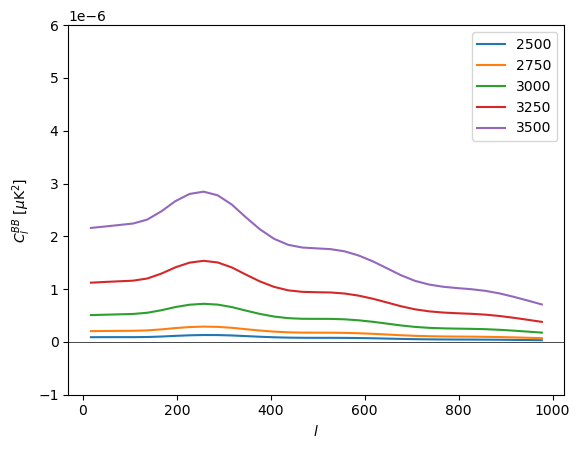

In [24]:
for lmax in [2500,2750,3000,3250,3500]:
    # Initialise experiments with various different mass cuts
    SO_5e15 = qest.experiment(lmax = lmax, massCut_Mvir=5e15, **SO_properties, 
                              **fg_cleaning_dict, fg=False, atm_fg=False)
    ells, cl_Btemp_x_Blens_bias, cl_Btemp_x_Btemp_bias, cl_Bdel_x_Bdel_bias = hm_calc.get_bias_to_delensed_clbb(SO_5e15, get_cib=get_cib, get_tsz=get_tsz, get_mixed=get_mixed, get_secondary_bispec_bias=get_secondary_bispec_bias)
    plt.plot(ells, cl_Bdel_x_Bdel_bias, label=lmax)

plt.ylabel(r'$C_l^{BB}$ [$\mu$K$^2$]')
plt.xlabel(r'$l$')
plt.legend()
plt.axhline(0, color='k', lw=0.5)
plt.ylim([-1e-6,6e-6])